# Abstracto

# Titulo: Exploración preliminar uni y multivariada de datos comprendiendo la distribución y relaciones entre las variables de interés, para posteriormente, realizar un método de análisis predictivo.

# Resumen:

El estudio adjunto, presenta un análisis exploratorio de datos aplicado a tres datasets de diferentes rubros, incluyendo Medicina, Inmobiliario, Financiero. 

En primera instancia, se tendrá por objetivo realizar exploraciones preliminares de los datasets, incluyendo la identificación y descripción cualitativa de las variables de interés (dependientes e independientes), dimensionalidad y tipo de datos, resumenes estadísticos, identificación y tratamiento de valores faltantes, etc. junto con el contexto de los datos de acuerdo al rubro al cual perteneces, para posteriormente poder seleccionar el data set con mayor información representativas y menor cantidad de datos faltantes, que nos permita posteriormente, aplicar un modelo supervisado predictivo de regresión o clasificación.

En segunda instancia, luego de haber seleccionado el dataset que más se adecua a nuestras necesidades, procederemos a realizar dos preguntas o hipótesis que se espera puedan ser resueltas a través de análisis estadísticos multivariados (dos o más variables) de manera grafica. Para ello se dispondrá de diferentes gráficos incluyendo Series de Tiempo, Correlación, Histogramas y Dispersión, los cuales nos permitirán identificar las variables dependientes e independientes, los valores atípicos o outliers, correlación entre variables de tipo numérica y finalmente el agrupamiento o clasificación para variables de tipo categóricas.

Finalmente, estos resultados preliminares nos proporcionarán una visión general de la estructura y naturaleza de los datos, facultando la generación de análisis más avanzados, junto con la construcción de modelos estadísticos predictivos de Machine Learning, a ser aplicados en investigaciones y proyectos futuros.  

In [1]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fuente: https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset
url1 = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Cardiovascular_Diseases.csv'
df1 = pd.read_csv(url1, index_col=0, nrows=25000)
df1.shape

(25000, 18)

In [3]:
#Fuente: https://www.kaggle.com/datasets/caesarmario/application-data
url2 = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/Application_Data.csv'
df2 = pd.read_csv(url2, index_col=0)
df2.shape

(25128, 20)

In [4]:
#Fuente: https://www.kaggle.com/datasets/arathipraj/house-data
url3 = 'https://raw.githubusercontent.com/jfdonosom/Data_Bases/main/House_Data.csv'
df3 = pd.read_csv(url3, index_col=0)
df3.shape

(21613, 20)

In [5]:
df1.sample(10)

,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
General_Health,,,,,,,,,,,,,,,,,,
Good,Within the past year,Yes,No,No,Yes,No,No,No,Female,45-49,175.0,90.72,29.53,No,1.0,60.0,25.0,15.0
Very Good,Within the past year,Yes,Yes,Yes,Yes,No,No,No,Male,70-74,175.0,77.11,25.10,Yes,28.0,12.0,12.0,2.0
Good,Within the past year,Yes,No,No,No,Yes,Yes,No,Female,55-59,165.0,99.79,36.61,Yes,30.0,12.0,0.0,2.0
Good,Within the past 5 years,Yes,No,No,No,No,No,No,Male,18-24,180.0,90.72,27.89,No,25.0,15.0,20.0,4.0
Very Good,Within the past 2 years,Yes,No,No,No,No,No,No,Female,40-44,168.0,58.97,20.98,No,4.0,90.0,28.0,5.0
Very Good,Within the past 2 years,Yes,No,No,No,No,No,Yes,Female,60-64,155.0,70.31,29.29,Yes,4.0,30.0,16.0,2.0
Very Good,Within the past year,No,No,No,No,No,Yes,No,Female,70-74,163.0,63.50,24.03,No,0.0,90.0,30.0,2.0
Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,30-34,178.0,83.91,26.54,No,4.0,60.0,16.0,1.0
Good,Within the past year,No,No,No,No,No,No,No,Female,35-39,163.0,58.97,22.31,Yes,1.0,30.0,8.0,10.0


In [6]:
# Llevamos la variable objetivo a la última columna.
nombre_variable_obj = df1.columns[2]
nombre_variable_obj
variable_obj = df1.pop(nombre_variable_obj)
df1.insert(len(df1.columns), nombre_variable_obj, variable_obj)
df1.sample(10)

,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
General_Health,,,,,,,,,,,,,,,,,,
Very Good,Within the past year,Yes,No,No,No,No,No,Male,55-59,178.0,88.00,27.84,No,3.0,30.0,20.0,7.0,No
Good,Within the past year,Yes,No,Yes,No,No,Yes,Male,60-64,188.0,145.15,41.09,No,4.0,16.0,12.0,16.0,No
Good,Within the past year,No,No,No,No,Yes,No,Male,40-44,168.0,108.86,38.74,No,0.0,15.0,29.0,0.0,No
Good,Within the past 2 years,Yes,No,No,No,No,No,Female,25-29,157.0,45.36,18.29,No,0.0,16.0,60.0,8.0,No
Excellent,Within the past year,Yes,No,No,No,No,No,Female,75-79,152.0,53.52,23.05,Yes,24.0,60.0,20.0,1.0,No
Very Good,Within the past year,Yes,No,No,Yes,Yes,No,Female,55-59,168.0,79.38,28.25,No,5.0,30.0,12.0,0.0,No
Excellent,Within the past year,Yes,No,No,No,No,No,Male,65-69,178.0,95.71,30.28,Yes,30.0,60.0,25.0,0.0,No
Excellent,Within the past year,Yes,Yes,No,No,No,Yes,Female,70-74,165.0,64.41,23.63,Yes,2.0,60.0,60.0,0.0,No
Fair,Within the past year,Yes,No,No,No,No,Yes,Female,80+,178.0,92.53,29.27,Yes,0.0,0.0,4.0,1.0,Yes


In [7]:
#Descripción Variables df1 - Modelo Supervisado de Clasificacion:
#1. General_health: Descripción general de estado de salud de la persona.
#2. Checkup: Tiempo que ha trasncurrido desde la última vez que la persona se hizo un chequeo de salud.
#3. Ejercise: Si la persona ha realizado ejercicio regularmente en el último mes.
#4. Skin_Cancer: Si la persona ha tenido Cáncer de piel.
#5. Other_Cancer: Si la persona ha tenido algún tipo de Cáncer.
#6. Depression: Si la persona ha padecido algún tipo de Depresión.
#7. Diabetes: Si la persona ha tenido Diabetes.
#8. Arthritis: Si la persona ha tenido o no Atritis.
#9. Sex: Género de la persona (Masculino o Femenino).
#10. Age_Category: Rango Etario del Paciente.
#11. Height_(cm): Altura en Centímetros.
#12. Weight_(kg): Peso en Kilogramos.
#13. BMI: Body Mass Index (índice de Masa Muscular)
#14. Smoking_History: El paciente posee historial de Fumador.
#15. Alcohol_Consumption: Consumo de Alcohol en Litros el último año.
#16. Fruit_Consumption: Consumo de frutas en Kilogramos el último año.
#17. Green_Vegetables_Consumption: Consumo de vegetales en Kilogramos el último año.
#18. FriedPotato_Consumption: Consumo de papas fritas en Kilogramos el último año.
#19. Heart_Disease: Si la persona ha padecido alguna enfermedad Cardíaca (Variable Dependiente, Objetivo).

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, Poor to Fair
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Checkup                       24120 non-null  object 
 1   Exercise                      24120 non-null  object 
 2   Skin_Cancer                   24120 non-null  object 
 3   Other_Cancer                  24120 non-null  object 
 4   Depression                    24120 non-null  object 
 5   Diabetes                      24120 non-null  object 
 6   Arthritis                     24120 non-null  object 
 7   Sex                           24120 non-null  object 
 8   Age_Category                  24120 non-null  object 
 9   Height_(cm)                   24120 non-null  float64
 10  Weight_(kg)                   24120 non-null  float64
 11  BMI                           24120 non-null  float64
 12  Smoking_History               24120 non-null  object 
 13  Alco

In [9]:
# Identificación % Valores Falatantes.
nulos_1 = pd.DataFrame({'Cantidad' : df1.isnull().sum(), 'Porcentaje' : (df1.isnull().sum()) / (len(df1)) * (100)})
nulos_1

,Cantidad,Porcentaje
Checkup,880,3.52
Exercise,880,3.52
Skin_Cancer,880,3.52
Other_Cancer,880,3.52
Depression,880,3.52
Diabetes,880,3.52
Arthritis,880,3.52
Sex,880,3.52
Age_Category,880,3.52
Height_(cm),880,3.52


In [10]:
# Procedemos a eliminar los valores nulos, los cuales son equivalentes en todas las columnas.
df1.dropna()

,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Heart_Disease
General_Health,,,,,,,,,,,,,,,,,,
Poor,Within the past 2 years,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0,No
Very Good,Within the past year,No,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0,Yes
Very Good,Within the past year,Yes,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0,No
Poor,Within the past year,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0,Yes
Good,Within the past year,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Excellent,Within the past year,Yes,No,No,No,No,No,Female,35-39,175.0,51.71,16.83,Yes,10.0,60.0,8.0,4.0,No
Good,Within the past 2 years,No,No,No,No,No,No,Male,45-49,183.0,136.08,40.69,Yes,4.0,0.0,8.0,0.0,No
Good,Within the past year,Yes,No,No,No,No,Yes,Male,70-74,168.0,79.38,28.25,Yes,20.0,90.0,30.0,8.0,Yes


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, Poor to Fair
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Checkup                       24120 non-null  object 
 1   Exercise                      24120 non-null  object 
 2   Skin_Cancer                   24120 non-null  object 
 3   Other_Cancer                  24120 non-null  object 
 4   Depression                    24120 non-null  object 
 5   Diabetes                      24120 non-null  object 
 6   Arthritis                     24120 non-null  object 
 7   Sex                           24120 non-null  object 
 8   Age_Category                  24120 non-null  object 
 9   Height_(cm)                   24120 non-null  float64
 10  Weight_(kg)                   24120 non-null  float64
 11  BMI                           24120 non-null  float64
 12  Smoking_History               24120 non-null  object 
 13  Alco

In [12]:
# Cambiamos Type Object por Category, haciendo más eficiente el procesamiento de datos.
df1['Checkup'] = df1['Checkup'].astype('category')
df1['Exercise'] = df1['Exercise'].astype('category')
df1['Heart_Disease'] = df1['Heart_Disease'].astype('category')
df1['Skin_Cancer'] = df1['Skin_Cancer'].astype('category')
df1['Other_Cancer'] = df1['Other_Cancer'].astype('category')
df1['Depression'] = df1['Depression'].astype('category')
df1['Diabetes'] = df1['Diabetes'].astype('category')
df1['Arthritis'] = df1['Arthritis'].astype('category')
df1['Sex'] = df1['Sex'].astype('category')
df1['Age_Category'] = df1['Age_Category'].astype('category')
df1['Smoking_History'] = df1['Smoking_History'].astype('category')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, Poor to Fair
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Checkup                       24120 non-null  category
 1   Exercise                      24120 non-null  category
 2   Skin_Cancer                   24120 non-null  category
 3   Other_Cancer                  24120 non-null  category
 4   Depression                    24120 non-null  category
 5   Diabetes                      24120 non-null  category
 6   Arthritis                     24120 non-null  category
 7   Sex                           24120 non-null  category
 8   Age_Category                  24120 non-null  category
 9   Height_(cm)                   24120 non-null  float64 
 10  Weight_(kg)                   24120 non-null  float64 
 11  BMI                           24120 non-null  float64 
 12  Smoking_History               24120 non-null  cat

In [14]:
df1.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,24120.000000,24120.000000,24120.000000,24120.000000,24120.000000,24120.000000,24120.000000
mean,170.524129,82.406169,28.262226,4.985365,29.740299,15.371725,6.069196
std,10.769513,20.714602,6.366418,8.322438,25.045375,14.914084,8.322507
min,97.000000,25.400000,12.160000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,23.960000,0.000000,12.000000,4.000000,1.000000
50%,170.000000,79.380000,27.260000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,92.990000,31.380000,5.000000,30.000000,20.000000,8.000000
max,234.000000,235.870000,89.100000,30.000000,120.000000,120.000000,120.000000


In [15]:
df1.describe(include='category')

,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History,Heart_Disease
count,24120,24120,24120,24120,24120,24120,24120,24120,24120,24120,24120
unique,5,2,2,2,2,2,2,2,13,2,2
top,Within the past year,Yes,No,No,No,No,No,Female,65-69,No,No
freq,17799,18598,21313,21696,19714,20801,16184,12503,2636,14136,22010


In [16]:
df2.sample(10)

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
Applicant_ID,,,,,,,,,,,,,,,,,,,,
5091346,F,0,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,1,0,Cooking staff ...,2,31,4,0,2,1
5068521,F,0,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,1,0,Core staff ...,2,44,8,0,26,1
5105181,M,0,1,0,180000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,0,0,Laborers ...,2,45,3,0,37,1
5096525,F,0,0,0,225000,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,1,1,0,0,Cleaning staff ...,2,37,2,2,10,1
5117487,F,0,0,0,108000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,1,0,Laborers ...,2,52,4,0,13,1
5096471,M,1,0,1,450000,Working ...,Higher education ...,Married ...,House / apartment ...,1,1,0,0,Managers ...,3,54,16,0,13,1
5142459,F,0,1,0,67500,Commercial associate ...,Higher education ...,Separated ...,House / apartment ...,1,0,1,0,Core staff ...,1,52,2,5,2,0
5068715,M,1,1,0,180000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,2,26,5,1,12,1
5088858,F,1,1,2,180000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,1,1,0,0,Managers ...,4,33,4,0,28,1


In [17]:
#Descripción Variables df2 - Modelo Supervisado de Clasificacion:
#1. Applicant_ID: Identificador Unico del Postulante a Obtener una Tarjeta de Credito
#2. Applicant_Gender: Sexo del Postulante (Masculino, Femenino)
#3. Owned_Car: Es dueño de un Auto (SI: 1, NO: 0)
#4. Owned_Realty: Es dueño de una Propiedad (SI: 1, NO: 0)
#5. Total_Children: N° de Hijos
#6. Total_Income: Ingresos Totales Anuales en USD.
#7. Income_Type: Tipo Fuente de Ingresos.
#8. Education_Type: Nivel de Educación.
#9. Family_Status: Estatus Familiar (Estado Civil)
#10. Housing_Type: Tipo de Residencia (Vivienda)
#11. Owned_Mobile_Phone: Es dueño de un Telefono Movil (SI: 1, NO: 0)
#12. Owned_Work_Phone: Posee un Telefono Coporrativo (SI: 1, NO: 0)
#13. Owned_Phone: Es dueño de un Telefono Fijo (SI: 1, NO: 0)
#14. Owned_Email: Posee un Email, Correo Elecronico (SI: 1, NO: 0)
#15. Job_Title: Puesto Profesión.
#16. Total_Family_Members: Miembros Totales en la Familia
#17. Applicant_Age: Edad del Aplicante.
#18. Years_of_Working: Años de Trabajo
#19. Total_Bad_Debt: % de Endeudamiento sobre los Ingresos, para pasivos asociados a obligaciones financieras que no pueden ser pagados o que no ofrecen beneficios en el largo plazo.
#20. Total_Good_Debt: % de Endeudamiento sobre los Ingresos, para pasivos que generalmente ayudan a generar riqueza o mejorar la situaci+on financiera de una persona.
#21. Status: Estatus Final Elegibilidad (ACEPTADO: 1, RECHAZADO: 0), (Variable Dependiente, Objetivo)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25128 entries, 5008806 to 5150487
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_Gender      25128 non-null  object
 1   Owned_Car             25128 non-null  int64 
 2   Owned_Realty          25128 non-null  int64 
 3   Total_Children        25128 non-null  int64 
 4   Total_Income          25128 non-null  int64 
 5   Income_Type           25128 non-null  object
 6   Education_Type        25128 non-null  object
 7   Family_Status         25128 non-null  object
 8   Housing_Type          25128 non-null  object
 9   Owned_Mobile_Phone    25128 non-null  int64 
 10  Owned_Work_Phone      25128 non-null  int64 
 11  Owned_Phone           25128 non-null  int64 
 12  Owned_Email           25128 non-null  int64 
 13  Job_Title             25128 non-null  object
 14  Total_Family_Members  25128 non-null  int64 
 15  Applicant_Age         25128 non-n

In [19]:
# Cambiamos Type Object por Category, haciendo más eficiente el procesamiento de datos.
df2['Applicant_Gender'] = df2['Applicant_Gender'].astype('category')
df2['Owned_Car'] = df2['Owned_Car'].astype('category')
df2['Owned_Realty'] = df2['Owned_Realty'].astype('category')
df2['Total_Children'] = df2['Total_Children'].astype('category')
df2['Income_Type'] = df2['Income_Type'].astype('category')
df2['Education_Type'] = df2['Education_Type'].astype('category')
df2['Family_Status'] = df2['Family_Status'].astype('category')
df2['Housing_Type'] = df2['Housing_Type'].astype('category')
df2['Owned_Mobile_Phone'] = df2['Owned_Mobile_Phone'].astype('category')
df2['Owned_Work_Phone'] = df2['Owned_Work_Phone'].astype('category')
df2['Owned_Phone'] = df2['Owned_Phone'].astype('category')
df2['Owned_Email'] = df2['Owned_Email'].astype('category')
df2['Job_Title'] = df2['Job_Title'].astype('category')
df2['Status'] = df2['Status'].astype('category')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25128 entries, 5008806 to 5150487
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Applicant_Gender      25128 non-null  category
 1   Owned_Car             25128 non-null  category
 2   Owned_Realty          25128 non-null  category
 3   Total_Children        25128 non-null  category
 4   Total_Income          25128 non-null  int64   
 5   Income_Type           25128 non-null  category
 6   Education_Type        25128 non-null  category
 7   Family_Status         25128 non-null  category
 8   Housing_Type          25128 non-null  category
 9   Owned_Mobile_Phone    25128 non-null  category
 10  Owned_Work_Phone      25128 non-null  category
 11  Owned_Phone           25128 non-null  category
 12  Owned_Email           25128 non-null  category
 13  Job_Title             25128 non-null  category
 14  Total_Family_Members  25128 non-null  int64   
 15 

In [21]:
df2.describe()

,Total_Income,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
count,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,1.948365e+05,2.291309,40.995503,7.690903,0.333095,21.057545
std,1.045211e+05,0.928871,9.552832,6.415007,1.569448,14.735347
min,2.700000e+04,1.000000,21.000000,1.000000,0.000000,1.000000
25%,1.350000e+05,2.000000,33.000000,3.000000,0.000000,9.000000
50%,1.800000e+05,2.000000,40.000000,6.000000,0.000000,18.000000
75%,2.250000e+05,3.000000,48.000000,10.000000,0.000000,31.000000
max,1.575000e+06,7.000000,68.000000,44.000000,49.000000,61.000000


In [22]:
df2.describe(include='category')

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Status
count,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128,25128
unique,2,2,2,6,5,5,5,6,1,2,2,2,18,2
top,F,0,1,0,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,1
freq,15627,14615,16457,15908,15616,16802,17507,22096,25128,18249,17772,22598,6211,25007


In [23]:
df3.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7853230590,20141029T000000,435000,4,2.50,2190,6578,2.0,0,0,3,7,2190,0,2004,0,98065,47.5305,-121.847,2190,5416
9368700270,20150401T000000,137900,3,1.75,1160,5082,1.0,0,0,3,6,580,580,1942,0,98178,47.5030,-122.262,1730,6000
726059349,20150319T000000,460000,3,1.75,1970,9135,1.0,0,0,4,7,1370,600,1961,0,98011,47.7603,-122.215,1880,9650
9542800290,20141210T000000,217000,3,2.00,1690,6750,1.0,0,0,3,7,1210,480,1977,0,98023,47.3021,-122.375,1930,7350
8901001170,20140514T000000,458000,3,1.00,1660,7500,1.0,0,0,4,7,1060,600,1940,0,98125,47.7105,-122.306,1450,7500
6446200190,20150420T000000,563750,4,2.75,2690,25000,1.0,0,0,3,8,1750,940,1978,0,98029,47.5537,-122.026,2640,28250
3583400120,20150204T000000,526750,5,2.50,2270,10700,1.0,0,0,4,8,1570,700,1963,0,98028,47.7410,-122.256,2020,10230
2896310420,20150219T000000,615000,4,2.75,3120,34040,2.0,0,0,3,9,3120,0,1997,0,98010,47.3431,-122.030,2420,25201
9510860060,20140627T000000,710000,3,2.50,2440,4153,2.0,0,0,3,9,2440,0,2003,0,98052,47.6650,-122.087,2030,4143


In [24]:
# Posicionamos la variable objetivo en la última columna.
nombre_variable_obj_3 = df3.columns[1]
nombre_variable_obj_3
variable_obj_3 = df3.pop(nombre_variable_obj_3)
df3.insert(len(df3.columns), nombre_variable_obj_3, variable_obj_3)
df3.sample(10)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,,,,,,,,,,,,,,,,,,,,
2821100125,20141120T000000,3,2.25,2140,6720,1.0,0,0,3,8,1440,700,1961,0,98117,47.6949,-122.396,2060,6720,524000
8731901910,20140616T000000,4,1.75,1960,7950,1.0,0,0,4,8,1960,0,1967,0,98023,47.3109,-122.377,1960,8400,285500
7853240660,20140820T000000,3,2.50,3060,7831,2.0,0,2,3,9,3060,0,2004,0,98065,47.5401,-121.861,3140,7438,650000
161000120,20141118T000000,4,2.00,2850,4497,1.5,0,1,3,7,1730,1120,1910,0,98144,47.5876,-122.292,2450,6000,650000
3990200020,20140908T000000,4,1.75,1680,9244,2.0,0,0,3,8,1680,0,1991,0,98166,47.4612,-122.352,1840,9387,359000
1523550480,20140613T000000,3,2.50,2040,4627,2.0,0,0,3,8,2040,0,1992,0,98052,47.6365,-122.108,2230,4500,580000
205000450,20140514T000000,4,2.50,2470,33305,2.0,0,0,3,9,2470,0,1993,0,98053,47.6303,-121.990,2440,33305,633100
6116500341,20150112T000000,4,1.50,2150,23568,1.0,0,0,4,7,2150,0,1950,0,98166,47.4522,-122.355,2150,10125,419000
203100440,20140911T000000,3,3.75,5400,24740,2.0,0,0,3,11,5400,0,1997,0,98053,47.6426,-121.955,1690,20000,1210000


In [25]:
#Descripción Variables df3 - Modelo Supervisado de Regresion:
#1. id: Identificar Unico por Propiedad Vendida
#2. date: Fecha de Venta de la Propiedad
#3. price: Precio de Venta en USD.
#4. bedrooms: N° Habitaciones
#5. bathrooms: N° Baños
#6. sqft _ living: Metros Cuadrados Efectivos (Utilizables)
#7. sqft _ lot: Metros cuadrados totales del Terreno.
#8. floors: N° Pisos
#9. waterfront: Si tienen vista al Mar/Bahia/Lago (SI: 1, NO:0)
#10. view: Rango de 0-4, indicando la calidad de la vista que tiene la propiedad. 
#11. condition: Rango de 1-5, indicando en qué estado se encuentra la propiedad.
#12. grade: Rango de 1-13, indicando nivel de construcción y diseño. (1-3: Bajo Nivel, 7: Promedio, 11-13: Alto Nivel)
#13. sqft _ above: Metros cuadrados de los Pisos Superiores (>1)
#14. sqft _ basement: Metros cudrádos Sótano.
#15. yr _ built: Año de construcción.
#16. yr _ renovated: Año de la última renovación.
#17. zipcode: Codigo Postal. 
#18. lat: Latitud
#19. long: longitud 
#20. sqft _ living15: Pies cuadrados de espacio habitable al interior de la vivienda para los 15 vecinos más cercanos a la propiedad.
#21. sqft _ lot15: Pies cuadrados de terrenos de las propiedades de los 15 vecinos más cercanos a la propiedad.

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 1

In [27]:
# LLevamos la fecha de venta a formato date y luego a año.
df3['date'] = pd.to_datetime(df3['date'])
df3['date'] = df3['date'].dt.year.astype('int64')

In [50]:
# Camiamos type object por category y también categorizamos variables numéricas que no tiene sentido disponerlas como número.
df3['bedrooms'] = df3['bedrooms'].astype('category')
df3['bathrooms'] = df3['bathrooms'].astype('int64')
df3['bathrooms'] = df3['bathrooms'].astype('category')
df3['floors'] = df3['floors'].astype('int64')
df3['floors'] = df3['floors'].astype('category')
df3['waterfront'] = df3['waterfront'].astype('category')
df3['view'] = df3['view'].astype('category')
df3['condition'] = df3['condition'].astype('category')
df3['grade'] = df3['grade'].astype('category')

In [51]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21613 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   date            21613 non-null  int64   
 1   bedrooms        21613 non-null  category
 2   bathrooms       21613 non-null  category
 3   sqft_living     21613 non-null  int64   
 4   sqft_lot        21613 non-null  int64   
 5   floors          21613 non-null  category
 6   waterfront      21613 non-null  category
 7   view            21613 non-null  category
 8   condition       21613 non-null  category
 9   grade           21613 non-null  category
 10  sqft_above      21613 non-null  int64   
 11  sqft_basement   21613 non-null  int64   
 12  yr_built        21613 non-null  int64   
 13  yr_renovated    21613 non-null  int64   
 14  zipcode         21613 non-null  int64   
 15  lat             21613 non-null  float64 
 16  long            21613 non-null  float64 
 17  sqf

In [30]:
df3.describe()

,date,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,2014.322954,2079.899736,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.467616,918.440897,4.142051e+04,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,2014.000000,290.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,2014.000000,1427.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,2014.000000,1910.000000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,2015.000000,2550.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,2015.000000,13540.000000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [31]:
df3.describe(include='category')

,bedrooms,bathrooms,floors,waterfront,view,condition,grade
count,21613,21613,21613.0,21613,21613,21613,21613
unique,13,9,6.0,2,5,5,12
top,3,2,1.0,0,0,3,7
freq,9824,10542,10680.0,21450,19489,14031,8981


# Considerando que los tres datasets tienen información representativa, pocos o nulos valores no numericos y tienen muchas variables interesantes de analizar, en esta ocasión elegiré el dataset N°3, asociado a la predicción del precio de una propiedad, dependiendo de las diferentes características de esta, debido a la claridad de la información, la facilidad para interpretar y generar relaciones entre las variables, los diferentes tipos de variables que posee, además de ser un campo del cual tengo mayor conocimiento y por lo tanto me interesa aprender más.

# Preguntas o Hipótesis

1. ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, el contexto del problema no nos permite tratarlas, sino que considerarlas como caso de estudio? 

3. Cuales variables NO fueron consideradas en este estudio, sin embargo, podrían tener un impacto significativo en las predicciones si se evalúan de la manera correcta?

# Objetivo: Al Analizar el dataset, no solo debemos identificar el tipo, la relación y/o los valores de esta, sino también el contexto en el cual están inmersas, lo cual seguramente nos permitirá obtener mejores interpretaciones de la información, basadas en el know how o conocimiento sobre la industria, holding o tema de interés.

# Contexto Comercial: Se posee información de las ventas de propiedades (Casas) en King County, Washington (USA) entre Mayo de 2014 y Mayo de 2015. Dentro de la información de venta, podemos encontrar diferentes variables categóricas del inmueble como tal, como también variables numéricas y georeferenciales. 

# Problema Comercial: ¿Cómo utilizamos de mejor manera la relación entre las diferentes variables disponibles, para poder generar un sistema venta predictivo, el cual nos permita predecir de manera fácil y rápida, cual sería el precio de venta de una nueva propiedad que ingresa al mercado, de acuerdo a sus características distintivas?

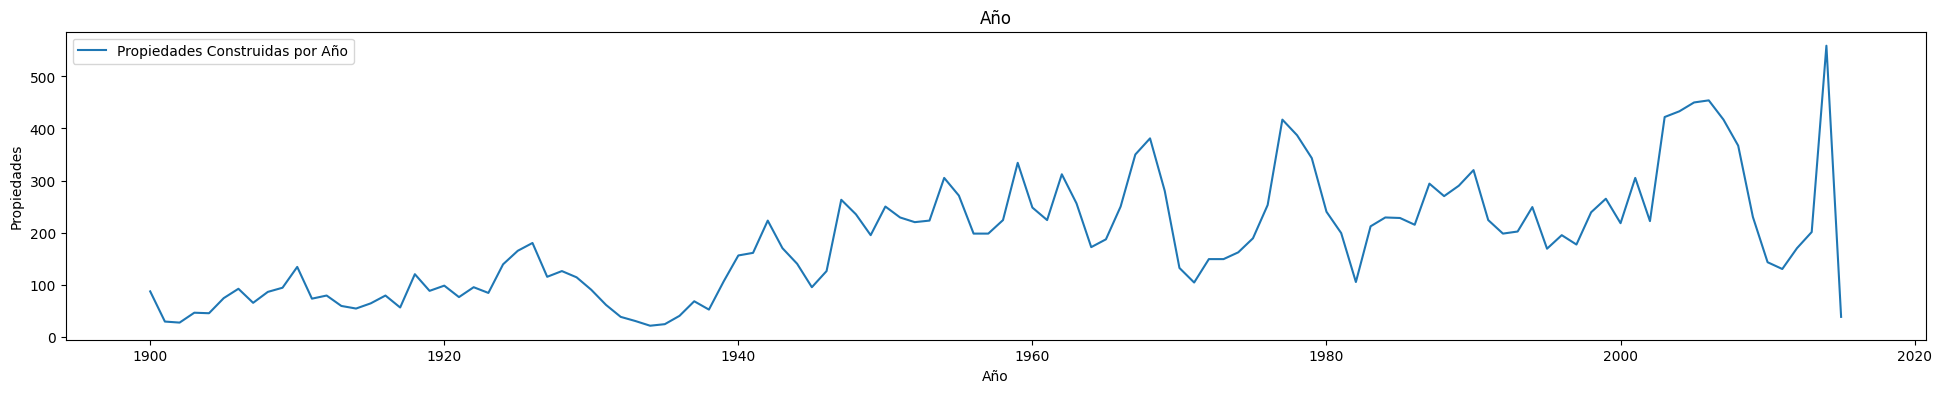

In [119]:
#Evolución de la construcción de propiedades a lo largo de los años.
num_propiedades = df3['yr_built'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(24, 4))
ax.plot(num_propiedades.index, num_propiedades.values, label='Propiedades Construidas por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Propiedades')
ax.set_title('Año')
ax.legend()
plt.show()

# En general, la construccion de propiedades ha tenido un ligero aumento desde 1960 a los años 2000, manteniendo un promedio de 200 propiedades construídas al año, en comparación con el tramo de 1900 - 1920. Sin embargo, dicho aumento ha venido acompañado también de una volatilidad muy alta. 

Text(0, 0.5, 'Precio USD')

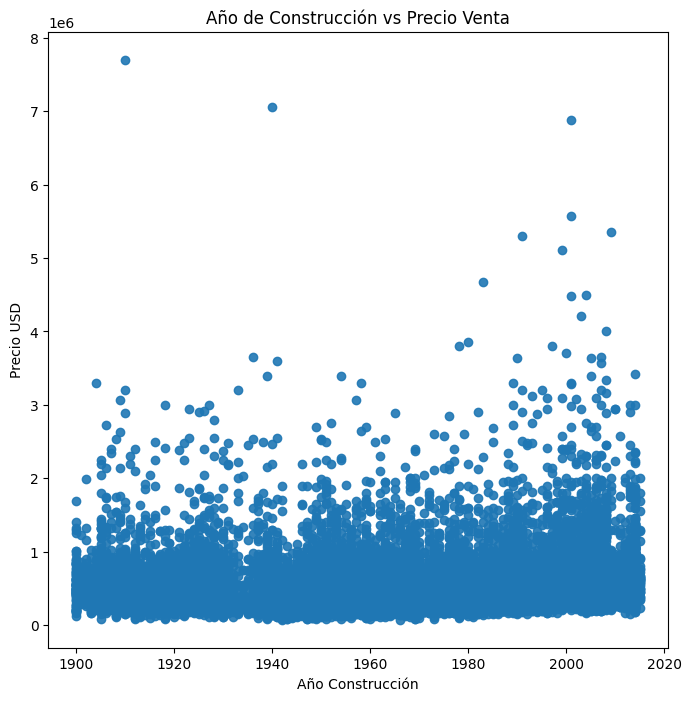

In [120]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df3['yr_built'], df3['price'], alpha=0.9)
ax.set_title('Año de Construcción vs Precio Venta')
ax.set_xlabel('Año Construcción')
ax.set_ylabel('Precio USD')

# Sin considerar ciertas excepciones, el grafico de dispersión, nos podría indicar que no necesariamente las propiedades van perdiendo su valor a medida que van aumentando su edad, sino que hasta pueden ser competitivas en precio con propiedades bastante nuevas, lo que puede hablar bien del grado de restauración que tienen las propiedades más antiguas, las cuales se encuentran vigentes y son bien valoradas en la actualidad.

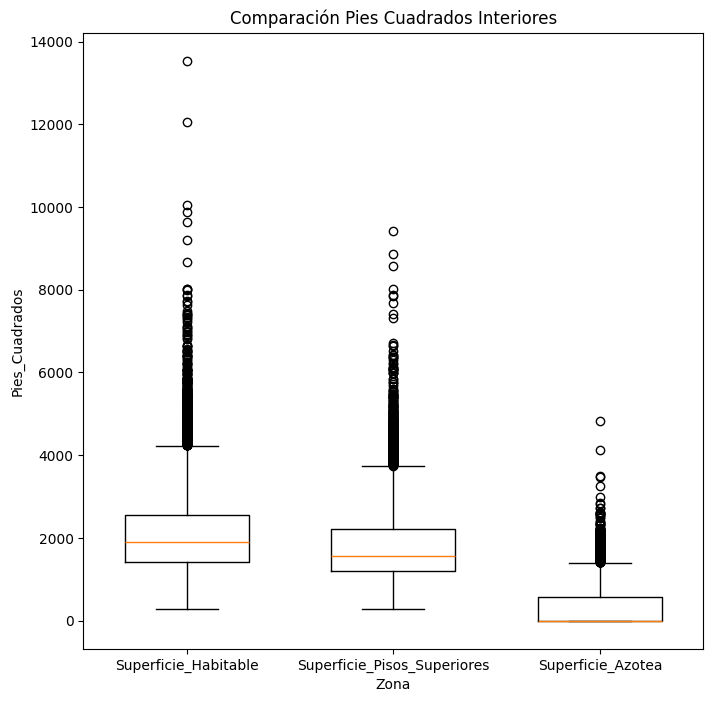

In [32]:
# Outliers (Valores Atípicos)
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df3['sqft_living'], positions=[1], widths=0.6)
ax.boxplot(df3['sqft_above'], positions=[2], widths=0.6)
ax.boxplot(df3['sqft_basement'], positions=[3], widths=0.6)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['Superficie_Habitable','Superficie_Pisos_Superiores', 'Superficie_Azotea'])
ax.set_title('Comparación Pies Cuadrados Interiores')
ax.set_xlabel('Zona')
ax.set_ylabel('Pies_Cuadrados')
ax.autoscale(axis='y')
plt.show()


# Considerando que 1 metro cuadrado = 10.76 pies cuadrados, los valores máximos y minimos de las siguientes variables en teoría no deberían ser consideros como outliers.

1. sqft_living: Max: 13540 (1258 m2), Min: 290 (27 m2)
2. sqft_above: Max: 9410 (874 m2), Min: 290 (27 m2)
3. sqft_basement: Max: 4820 (448 m2), Min: 0 (sin azotea)

# Por lo tanto, no vale la pena descartarlos, sino tenerlos en consideración como variables desviadas a ser estudiadas en mayor profundidad.

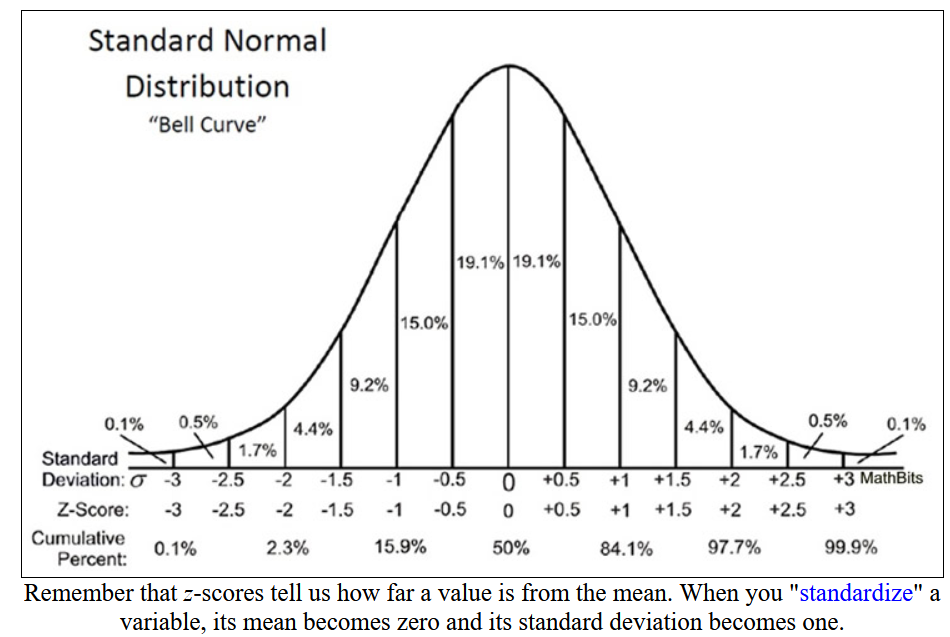

In [33]:
# Variable Objetivo: Price
# Identificamos los valores atípicos del precio de acuerdo al modelo Z-Score. 

df3['price_z'] = (df3['price'] - df3['price'].mean())/df3['price'].std()
df3['price_outliers'] = 0
df3.loc[(df3['price_z']>3)|(df3['price_z']<-3) , 'price_outliers'] = 1
df3[['price', 'price_z','price_outliers']]

,price,price_z,price_outliers
id,,,
7129300520,221900,-0.866697,0
6414100192,538000,-0.005688,0
5631500400,180000,-0.980827,0
2487200875,604000,0.174086,0
1954400510,510000,-0.081956,0
...,...,...,...
263000018,360000,-0.490533,0
6600060120,400000,-0.381579,0
1523300141,402101,-0.375856,0


In [34]:
df3['price_outliers'].value_counts()

price_outliers
0    21207
1      406
Name: count, dtype: int64

In [124]:
print(df3.loc[df3['price_outliers'] == 1, 'price'])

id
2524049179    2000000
7855801670    2250000
2025069065    2400000
7960900060    2900000
7424700045    2050000
               ...   
3262300818    1865000
8964800330    3000000
715010530     1881580
524059330     1700000
9253900271    3567000
Name: price, Length: 406, dtype: int64


In [125]:
print(df3.loc[df3['price_outliers'] == 1, 'price'].max())
print(df3.loc[df3['price_outliers'] == 1, 'price'].min())

7700000
1646000


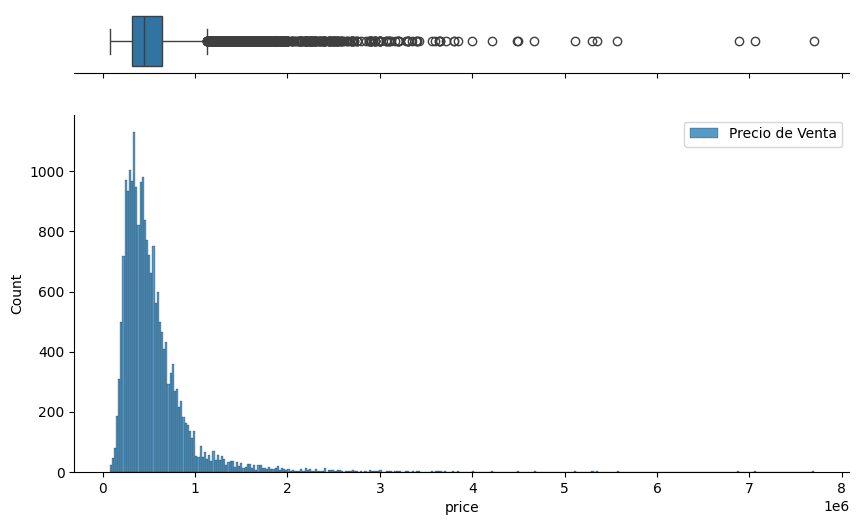

In [121]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df3['price'], ax=ax_box, orient="h") 
sns.histplot(df3['price'], ax=ax_hist, label='Precio de Venta')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

# Si analizamos los valores máximos y mínimos de los outliers de precios, los cuales se encuentran todos sobre el 3er cuartil, no es tan descabellado pensar que el rango de precios de valores atípicos se encuentre entre los siguientes márgenes:

1. Máx: $ USD 7,700,000 (Siete Millones, Setecientos Mil Dólares)
2. Mín: $ USD 1,646,000 (Un Millon, Seisciencitos Cuarenta y Seis Mil Dólares)

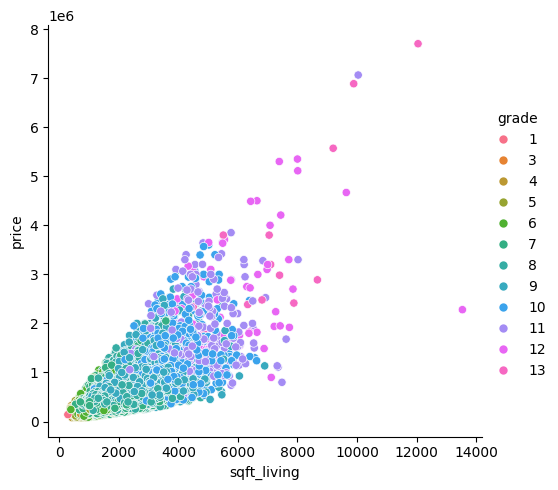

In [41]:
Scatter = sns.relplot(df3, x="sqft_living", y="price", hue="grade", kind="scatter")

Text(0, 0.5, 'precio_USD')

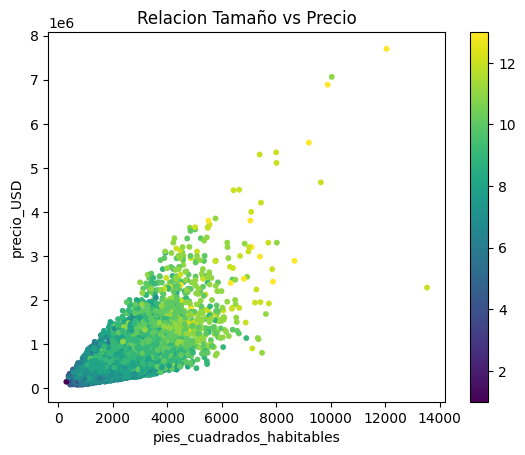

In [46]:
fig, ax = plt.subplots()
grafico = ax.scatter(df3['sqft_living'], df3['price'], c=df3.grade,s=10)
fig.colorbar(grafico)
ax.set_title('Relacion Tamaño vs Precio')
ax.set_xlabel('pies_cuadrados_habitables')
ax.set_ylabel('precio_USD')

# En gral, existe una correlacion directa entre el tamaño de una propiedad y su precio, lo cual puede verse reflejado también a través de la calificación de esta ('grade'), en donde en gral, propiedades mejor calificadas, deberían tener un precio mayor.

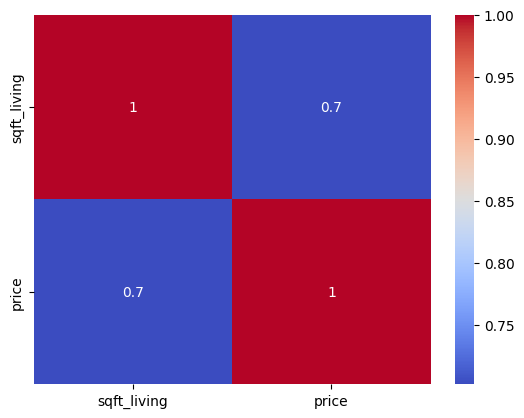

In [47]:
#https://seaborn.pydata.org/tutorial/color_palettes.html
# Matriz de Correlación pies_cuadrados vs precio.

columns = df3[['sqft_living', 'price']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# Como suponíamos, existe una correlación alta entre los pies cuadrados habitables de una propiedad y su precio de venta.

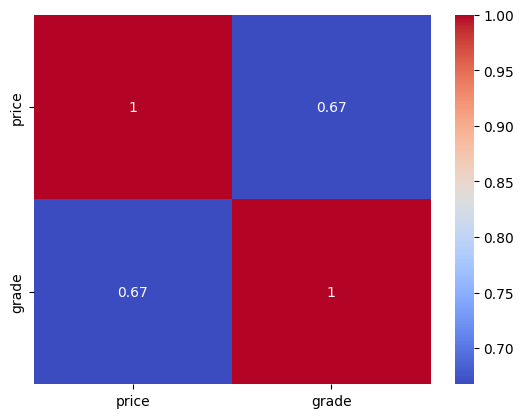

In [49]:
columns = df3[['price', 'grade']]
matriz_corr = columns.corr()
sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

# Sin embargo, la correlación entre la calificación y el precio no suele ser tan alta y por lo tanto poco conclussa.

<Axes: xlabel='grade', ylabel='Count'>

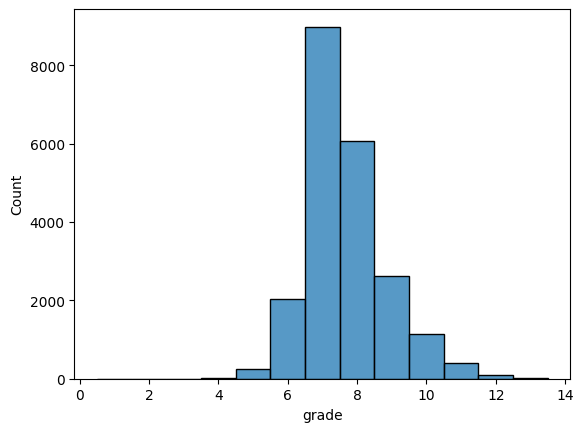

In [75]:
# Histograma
sns.histplot(df3, x="grade")

# Generalmente las propiedades con calificaciones más altas, suelten ser menos, ya que se requiere cumplir con un mayor número de parámetros de construcción y diseño.

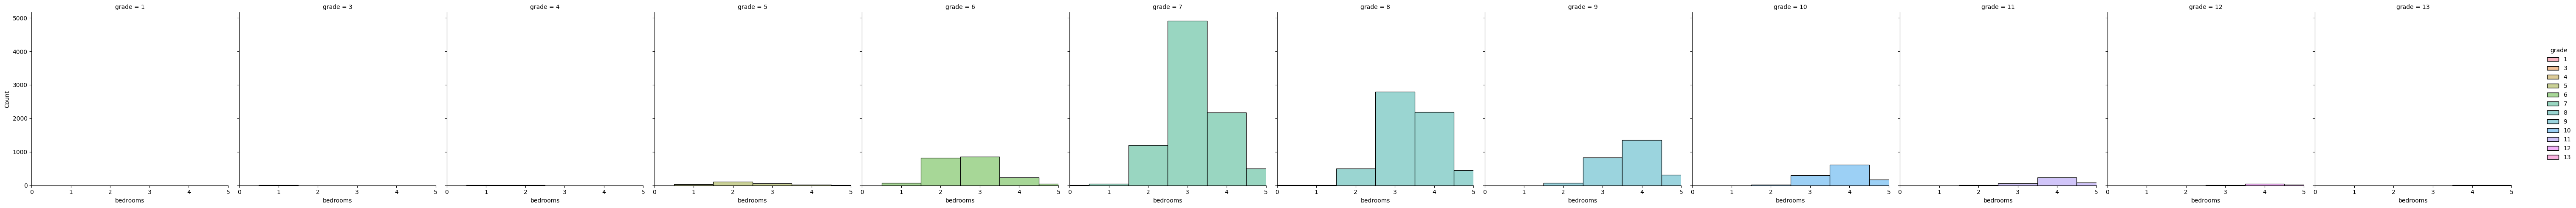

In [58]:
# Histograma por Categoria (Figure-level) - Habitaciones.

bin_width = 1
bin_range = range(0, 5, bin_width)
grafico_1 = sns.displot(df3, x="bedrooms", hue="grade", col="grade", bins=bin_range)
grafico_1.set(xlim=(0,5))


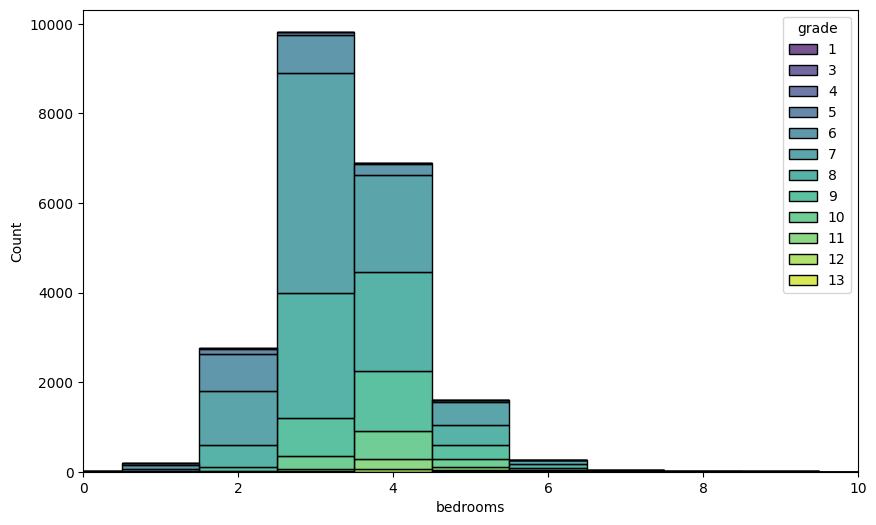

In [76]:
# Histograma Apilado por Catergoria - Habitaciones.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bedrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.show()

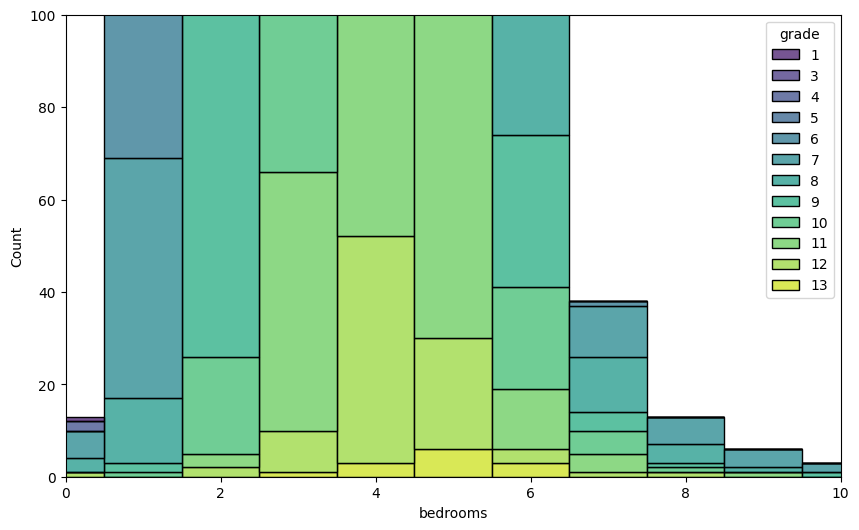

In [80]:
# Histograma Apilado por Catergoria - Habitaciones.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bedrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

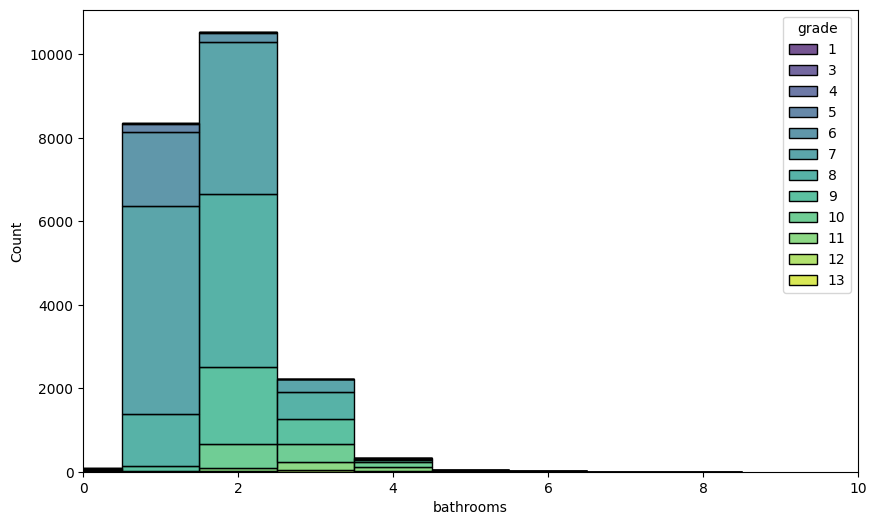

In [81]:
# Histograma Apilado por Catergoria - Baños.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bathrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.show()

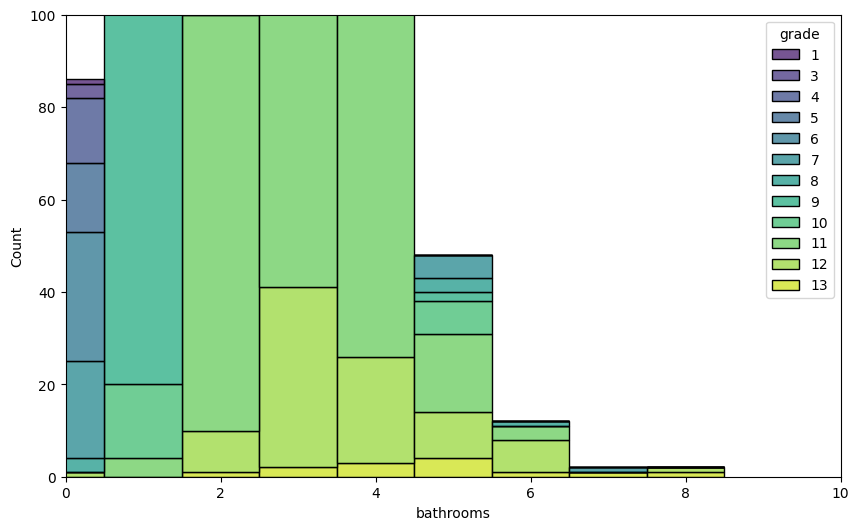

In [84]:
# Histograma Apilado por Catergoria - Baños.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="bathrooms", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,10)
plt.ylim(0,100)
plt.show()

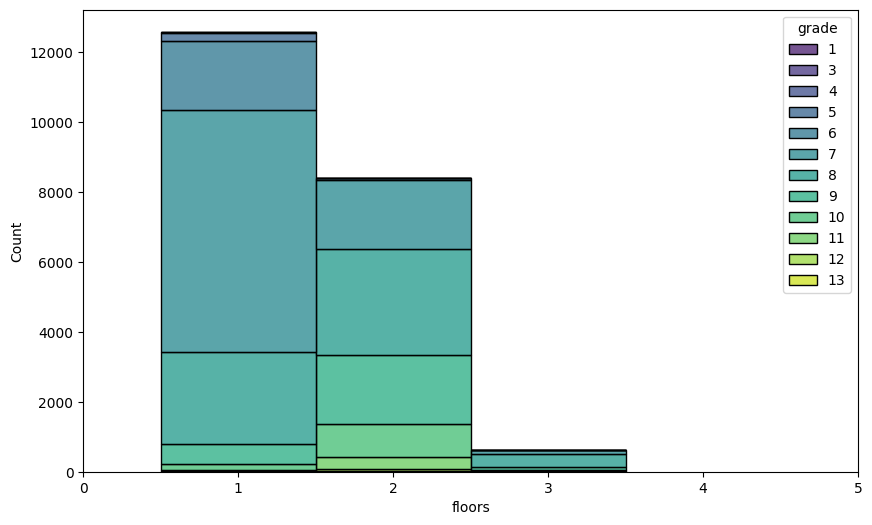

In [86]:
# Histograma Apilado por Catergoria - Pisos.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="floors", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,5)
plt.show()

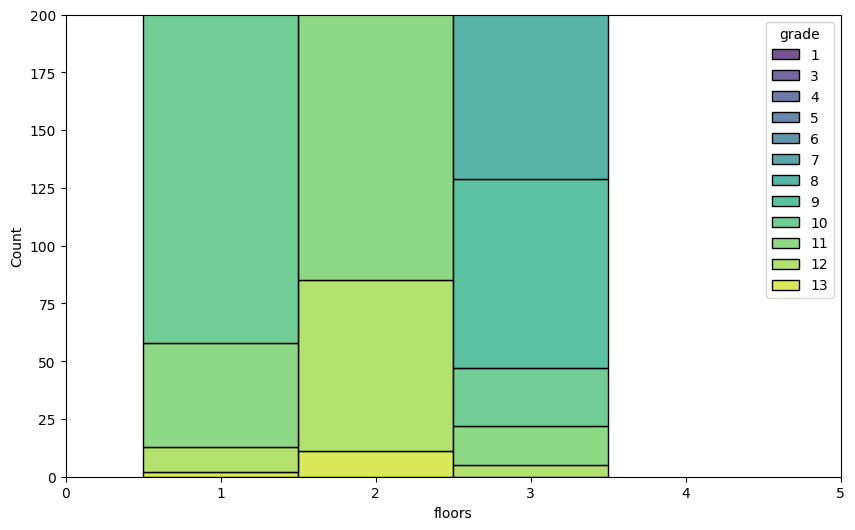

In [101]:
# Histograma Apilado por Catergoria - Pisos.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="floors", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,5)
plt.ylim(0,200)
plt.show()

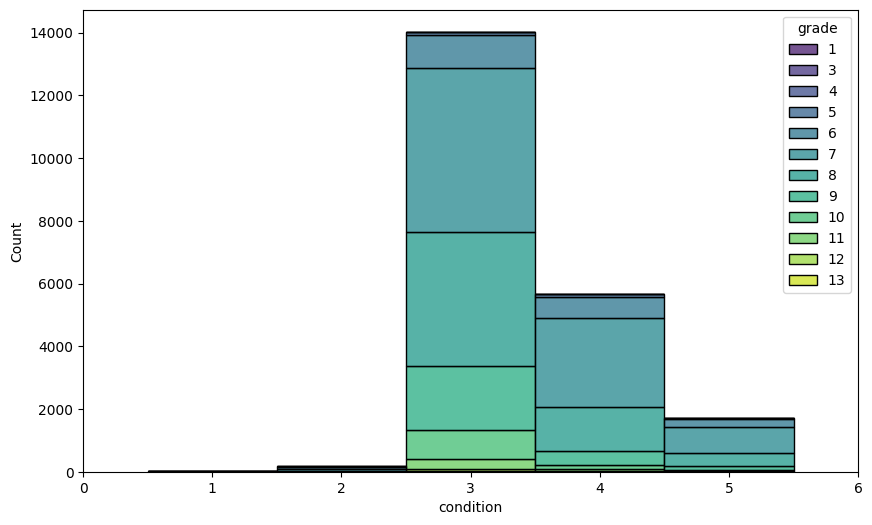

In [96]:
# Histograma Apilado por Catergoria - Estado de la Propiedad.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="condition", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,6)
plt.show()

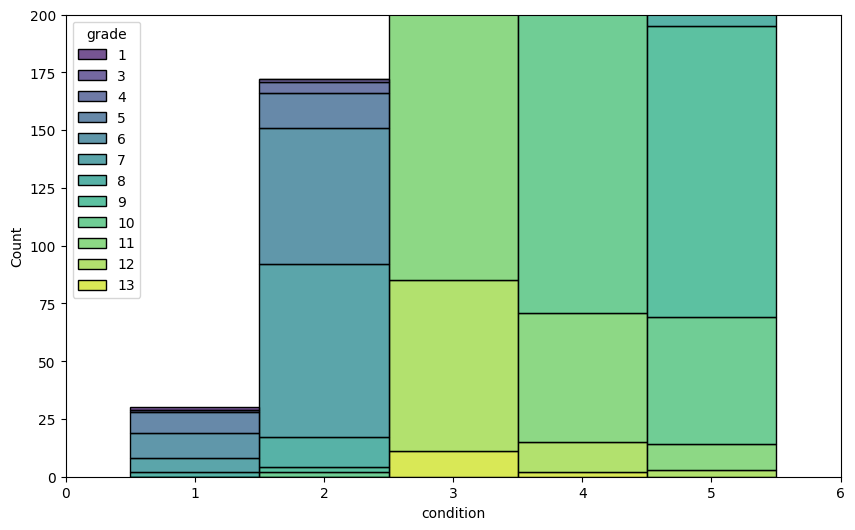

In [98]:
# Histograma Apilado por Catergoria - Estado de la Propiedad.
plt.figure(figsize=(10, 6))
sns.histplot(df3, x="condition", hue="grade", multiple="stack", palette='viridis')
plt.xlim(0,6)
plt.ylim(0,200)
plt.show()

# En general, la variable 'grade' (calificación de la propiedad), asociada al nivel de construcción y diseño (1-13), no tiene relacion directa con el número de habitaciones de la casa, sin embargo, esta variable si presenta una tendencia más ajustada al momento de compararla con el número de baños de la casa, donde la categoría aumenta a media que aumentan los baños. Por otro lado, los pisos, al ser una variable categórica de 3 categorías únicamente, no entrega información concluyente con respecto a la relación de calificación de la propiedad, mientras que el estado de la propiedad, si influye de manera significativa en la calificación que se tiene de esta.

# Respuestas y Recomendaciones en base a los Insights.

Q.1 ¿Cuáles son las variables independientes que influyen más significativamente en las variaciones de la variable dependiente (objetivo)?

A.1 De acuerdo a los análisis realizados principalmente a través de gráficos de dispersión y correlación, las variables que impactan en mayor medida al precio de una propiedad, son los pies cuadrados habitables y calificación de dicha propiedad, con tasas de correlación de un 70% y un 67% respectivamente.

Q.2. ¿Qué variables poseen valores atípicos que podrían ser fácilmente reemplazados y/o eliminados, sin embargo, el contexto del problema no nos permite tratarlas, sino que considerarlas como caso de estudio?

A.2 Al analizar las variables inmobiliarias de espacio disponible ('sqft_living', 'sqft_above', 'sqft_basement') y la variable 'price', a través de gráficos de Box-Plot, Histográmas y el Método Z-Score, si bien se identificaron outliers o valores atípicos bastante alejados de los cuartiles principales, considerando el contexto del problema, se llegó a la conclsuión que dichos valores son perfectamente factibles dentro de la realidad y por la misma razón, si el contexto no hubiera sido considerado, estos valores hubieran sido fácilmente tratados, perdiendo la representatividad de la muestra de los datos y por consiguiente, generando posteriormente análisis y modelos sesgados.  

Q.3. Cuales variables NO fueron consideradas en este estudio, sin embargo, podrían tener un impacto significativo en las predicciones si se evalúan de la manera correcta?

A.3 Las variables de latitud y longitud no fueron tratadas en este estudio, debido a que de momento no se manejan herramientas para visualizar georeferecialmente un punto en un plano de dos dimensiones, incluyendo características geográficas. Sin embargo, creo que estas variables si las trabajamos de manera correcta, podrían tener un impacto significativo en la variable objetivo, ya que podríamos generar diferentes estrategias de clustering de acuerdo a barrios y o vecindarios en los cuales se encuentran las propiedades, valorando el precio de estas en función del fácil acceso a diferentes comodidades como transporte, educación, supermercados, hospitales, etc.